### Support Vector Machine:

* This is one of the classifier.
* This is can be used as classifier as well as regressor.
* The classification is done using the plane 
    * Two vectors used to classify the elements into categories
    * first vector drawn nearer to the first category element and second vector drawn nearer to the second category element.
    * The middle line of the two vectors called as maximum margin hyperplane.
    
    


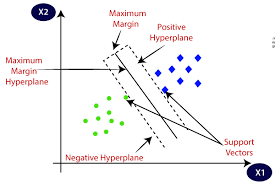

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
d = pd.read_csv("https://raw.githubusercontent.com/AP-Skill-Development-Corporation/Tirumala-ML/main/Day-6/winequality.csv")
d.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
d.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
d.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

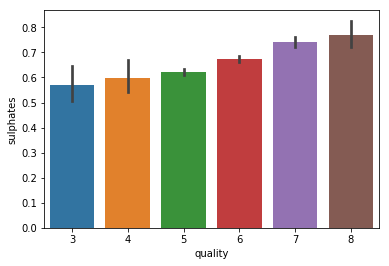

In [8]:
### Quality vs sulphates:

sns.barplot(x = 'quality',y = "sulphates",data = d)

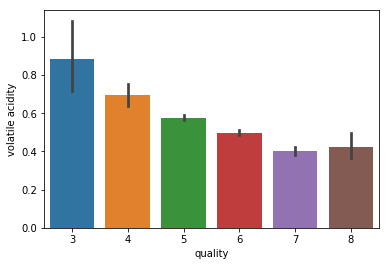

In [9]:
## quality and volatile acidity:

sns.barplot(x = "quality",y = "volatile acidity",data = d)
plt.show()

In [10]:
d['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [11]:
bins = [2,6.5,8]
group_name = ["bad","good"]
categories = pd.cut(d['quality'],bins,labels = group_name)

In [12]:
d['quality'] = categories

In [13]:
d['quality']

0        bad
1        bad
2        bad
3        bad
4        bad
5        bad
6        bad
7       good
8       good
9        bad
10       bad
11       bad
12       bad
13       bad
14       bad
15       bad
16      good
17       bad
18       bad
19       bad
20       bad
21       bad
22       bad
23       bad
24       bad
25       bad
26       bad
27       bad
28       bad
29       bad
        ... 
1569     bad
1570     bad
1571     bad
1572     bad
1573     bad
1574     bad
1575     bad
1576     bad
1577     bad
1578     bad
1579     bad
1580     bad
1581     bad
1582     bad
1583     bad
1584    good
1585     bad
1586     bad
1587     bad
1588     bad
1589     bad
1590     bad
1591     bad
1592     bad
1593     bad
1594     bad
1595     bad
1596     bad
1597     bad
1598     bad
Name: quality, Length: 1599, dtype: category
Categories (2, object): [bad < good]

In [14]:
d['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

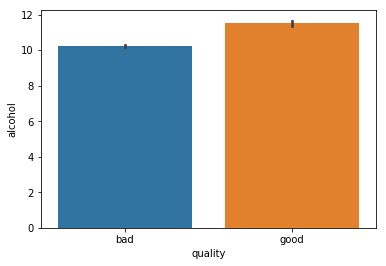

In [16]:
sns.barplot(x = 'quality',y = 'alcohol',data = d)

In [18]:
x = d.drop(['quality'],axis = 1)  ### input
y = d['quality']   ### output

In [19]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5


In [20]:
y

0        bad
1        bad
2        bad
3        bad
4        bad
5        bad
6        bad
7       good
8       good
9        bad
10       bad
11       bad
12       bad
13       bad
14       bad
15       bad
16      good
17       bad
18       bad
19       bad
20       bad
21       bad
22       bad
23       bad
24       bad
25       bad
26       bad
27       bad
28       bad
29       bad
        ... 
1569     bad
1570     bad
1571     bad
1572     bad
1573     bad
1574     bad
1575     bad
1576     bad
1577     bad
1578     bad
1579     bad
1580     bad
1581     bad
1582     bad
1583     bad
1584    good
1585     bad
1586     bad
1587     bad
1588     bad
1589     bad
1590     bad
1591     bad
1592     bad
1593     bad
1594     bad
1595     bad
1596     bad
1597     bad
1598     bad
Name: quality, Length: 1599, dtype: category
Categories (2, object): [bad < good]

In [21]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [23]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)


In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [30]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
classifier = SVC(kernel = "rbf",random_state = 2)
classifier.fit(x_train,y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=2,
  shrinking=True, tol=0.001, verbose=False)

In [32]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [33]:
accuracy_score(y_pred,y_test)

0.8875

In [34]:
confusion_matrix(y_pred,y_test)

array([[355,  45],
       [  0,   0]], dtype=int64)

In [35]:
help(classifier)

Help on SVC in module sklearn.svm.classes object:

class SVC(sklearn.svm.base.BaseSVC)
 |  SVC(C=1.0, kernel='rbf', degree=3, gamma='auto_deprecated', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to dataset with more than a couple of 10000 samples.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  other, see the corresponding section in the narrative documentation:
 |  :ref:`svm_kernels`.
 |  
 |  Read more in the :ref:`User Guide <svm_classification>`.
 |  
 |  Parameters
 |  ----------
 |